# Extracting Random Patches

This notebook looks at extracting random patches from various carcinoma and sarcoma images.

### Importing Libraries

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

### Finding and Loading an Image

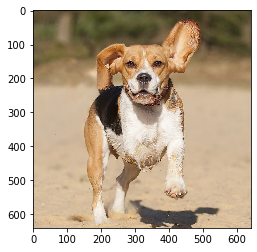

In [2]:
img = mpimg.imread('testdog.jpg')
imgplot = plt.imshow(img)

### Miscellaneous Patch Generation Function

In [3]:
def generate_patches(imgdir, x_coord, y_coord):
    imagesList = os.listdir(rootDirectory)
    for imageName in imagesList:
        im = Image.open(rootDirectory + "/" + imageName)
        width, height = im.size
        x = 0
        y = 0
        counter = 0
        while (y < 1000):
            x = 0
            while (x < 1000):
                box = (x, y, x + 256, y + 256)
                region = im.crop(box)
                region.save("patches/" + rootDirectory + "/" + imageName + "-patch" + str(counter) + ".jpg", "JPEG")
                x = x + 128
                counter = counter + 1
            y = y + 128

### Function for Generating Patches

In [4]:
def generate_patch(imgdir, x_coord, y_coord, patch_size):
    im = Image.open(imgdir)
    box = (x_coord, y_coord, x_coord + patch_size, y_coord + patch_size)
    region = im.crop(box)
    region.save("testpatch_" + str(x_coord) + "_" + str(y_coord) + ".jpg", "JPEG")

### Playing Around with Sizes of Images

In [5]:
im = Image.open("testdog.jpg")
width, height = im.size
print(width)
print(height)

640
640


### Function for Mapping Random Coordinates

In [6]:
def random_patches(imgdir, patch_size, sliding_window):
    
    #Unpackaging the Image
    im = Image.open(imgdir)
    width, height = im.size
    
    #Getting the bounds for the number of patches available in the image
    w_bound = int((width / sliding_window) - 1)
    h_bound = int((height / sliding_window) - 1)
    
    #For testing the amount of patches available in the image
    print("Amount of patches from width: " + str(w_bound))
    print("Amount of patches from height: " + str(h_bound))
    
    #Randomly determining which patches to choose from
    w_rand = random.randint(1, w_bound - 1)
    h_rand = random.randint(1, h_bound - 1)
    
    #For testing the selected x and y patch
    print("Randomly selected x patch: " + str(w_rand))
    print("Randomly selected y patch: " + str(h_rand))
    
    #For finding the x and y coordinates of the actual patch
    x_coord = (patch_size * w_rand) - patch_size
    y_coord = (patch_size * h_rand) - patch_size
    
    #For testing the values of the x and y coordinates
    print("X coordinate of the patch: " + str(x_coord))
    print("Y coordinate of the patch: " + str(y_coord))
    
    generate_patch(imgdir, x_coord, y_coord, patch_size)

### Testing Random Coordinates Function

In [9]:
random_patches("testdog.jpg", 256, 128)

Amount of patches from width: 4
Amount of patches from height: 4
Randomly selected x patch: 1
Randomly selected y patch: 2
X coordinate of the patch: 0
Y coordinate of the patch: 256
